# Example of Adaptive Exponential Integrate and Fire neuron model

Import som useful libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Import necessary modules

In [2]:
import sys
sys.path.insert(0, "../Scripts")

import stim_util as su
from neuron import AdExpIF
from simulation import Simulation

#### Create a simulation environment

In [3]:
mySim = Simulation(period=1500, fs=100)

**Period**: Period of time we would liek to run the simulation for. Unit = millisecond

**fs**: Sampling frequency of our simulation - it defines the time step of our simulaiton as well

#### Create a stimulation signal

In [4]:
I_stim = 400 * su.gen_pulse(init_time=400, on_width=300, off_width=200, time_points=mySim.t)

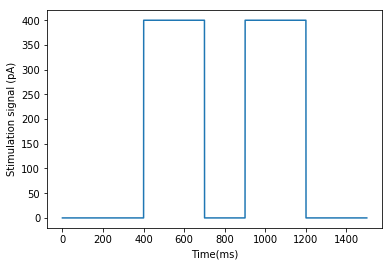

In [5]:
fig, ax = plt.subplots()
ax.plot(mySim.t, I_stim)
plt.xlabel('Time(ms)')
plt.ylabel('Stimulation signal (pA)')
plt.show()

#### Create a neuron

Define the constant parameters (during the simulation), as well as the changing parameters, of the neuron model.

In [6]:
const_params = {
    'C': 130,  # pF - membrane capacitance
    'gL': 1,  # nS - leak conductance
    'EL': -70.6,  # mV
    'VT': -50.6,  # mV
    'dT': 2,  # mV
    'tauw': 300,  # ms adaptation time-constant
    'a': 30,  # mS - subthreshold oscillation parameter
    'b': 80.5,  # pA - spike-triggered adaptation constants
    'vpeak': 20,  # mV
    'taum': 130/1  # C/gL
}

tracked_params = ['v', 'w']

In [7]:
myNeuron = AdExpIF(const_params=const_params,
                   tracked_params=tracked_params,
                   time_points=mySim.t)

#### Run the simulation

Add the neuron model and the stimulation signal to your simulation object

In [8]:
mySim.neuron = myNeuron
mySim.stim = I_stim

Now you can run the simulation

In [9]:
mySim.run()

#### Visualize the reponse

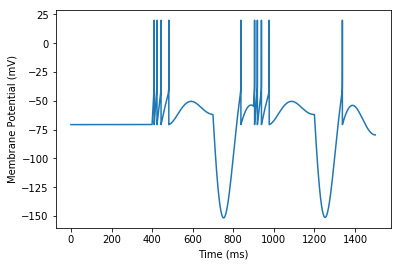

In [10]:
fig, ax = plt.subplots()
ax.plot(mySim.t, myNeuron.v)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()